# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

# Reading the datasets

In [2]:
df_hypotheses = pd.read_csv("D:\Tripleten\Projects\Sprint-9-Making-Data-Driven-Business-Decisions\data\hypotheses_us.csv", sep=';')
df_orders = pd.read_csv("D:\Tripleten\Projects\Sprint-9-Making-Data-Driven-Business-Decisions\data\orders_us.csv", sep=',')
df_visits = pd.read_csv(r"D:\Tripleten\Projects\Sprint-9-Making-Data-Driven-Business-Decisions\data\visits_us.csv", sep=',')

# Data Overview

In [3]:
df_hypotheses.info()
df_hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Changing column names to lowercase
df_hypotheses.columns = df_hypotheses.columns.str.lower()

---

In [5]:
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
# Searching for duplicates 
df_orders.duplicated().sum()

0

In [7]:
# Changing `date` column from object to datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

---

In [8]:
df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# Searching for duplicates
df_visits.duplicated().sum()

0

In [10]:
# Changing `date` column from object to datetime
df_visits['date'] = pd.to_datetime(df_visits['date'])

---

# Step 1 - Prioritizing Hypotheses

### Apply the ICE framework to prioritize hypotheses. Rank them in descending order of priority.

In [11]:
df_hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [12]:
df_hypotheses['ice'] = df_hypotheses['impact'] * df_hypotheses['confidence'] / df_hypotheses['effort']
df_hypotheses.sort_values(by= 'ice', ascending= False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


### Apply the RICE framework to prioritize hypotheses. Rank them in descending order of priority.

In [13]:
df_hypotheses['rice'] = df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence'] / df_hypotheses['effort']
df_hypotheses.sort_values(by= 'rice', ascending= False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### Show how the prioritization of hypotheses changes when you use RICE instead of ICE.

Applying ICE, we are multiplying impact, confidence and ease. So, ranking the first 3 hypotheses, we observe that the first two have the lowest reach, but with a large impact, and the third has a little less reach but with a large reach. Still taking into account the first 3 hypotheses, we have high points for confidence and an average effort.

Applying RICE, we are multiplying reach, impact and confidence divided by efforts. The first hypothesis in this ranking has a high number for reach, impact and confidence and its effort is average. The second has a still good reach, but the impact is very low but with great confidence and an almost minimal effort. And the third has little reach, a large impact and confidence and an average effort.

---

# Step 2 - A/B Test Analysis

### You ran an A/B test and got the results described in the `orders_us.csv` and `visitors_us.csv` files.

1. Make a graph of the accumulated revenue by group. Draw conclusions and conjectures.

In [14]:
# grouping the groups and calculating the cumulative revenue
group_revenue = df_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
group_revenue['cumulative_revenue'] = group_revenue.groupby('group')['revenue'].cumsum()
group_revenue.head()

,date,group,revenue,cumulative_revenue
0,2019-08-01,A,2356.8,2356.8
1,2019-08-01,B,1620.0,1620.0
2,2019-08-02,A,1503.5,3860.3
3,2019-08-02,B,2623.8,4243.8
4,2019-08-03,A,1815.2,5675.5


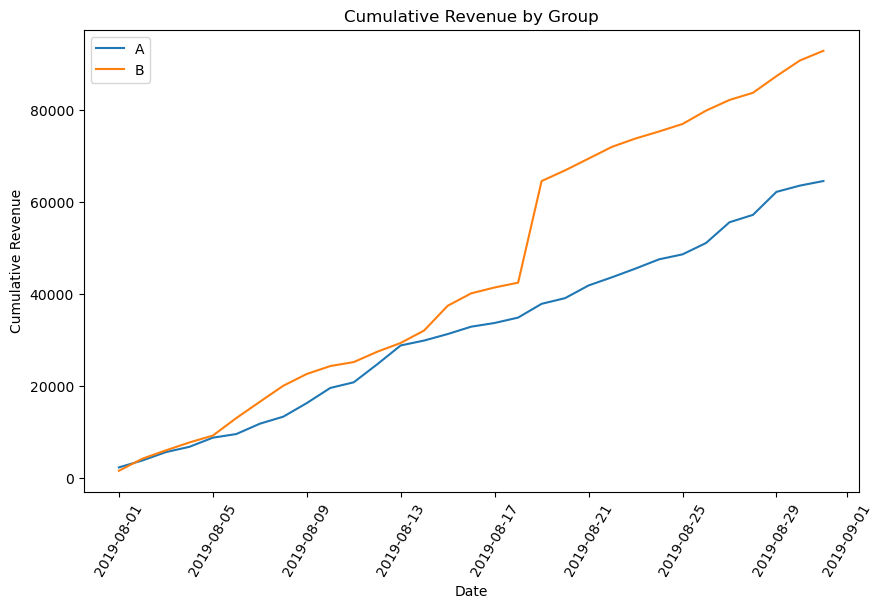

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= group_revenue, x='date', y='cumulative_revenue', hue='group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.legend()
plt.xticks(rotation=60);

Note
- As we can see, the two groups started together, had some differences but at the end of the month the difference is clear: group B spent much more than group A.

2. Plot a graph of the cumulative average order size by group. Draw conclusions and conjectures.

In [16]:
# grouping the groups and adding up the revenue
group_avg_order = df_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calculate cumulative sum and cumulative count
cumulative_sum = group_avg_order.groupby('group')['revenue'].cumsum()
cumulative_count = group_avg_order.groupby('group')['revenue'].cumcount() + 1

# Calculate average revenue, avoiding division by zero
group_avg_order['avg_revenue'] = cumulative_sum / cumulative_count

group_avg_order.head()

,date,group,revenue,avg_revenue
0,2019-08-01,A,2356.8,2356.800000
1,2019-08-01,B,1620.0,1620.000000
2,2019-08-02,A,1503.5,1930.150000
3,2019-08-02,B,2623.8,2121.900000
4,2019-08-03,A,1815.2,1891.833333


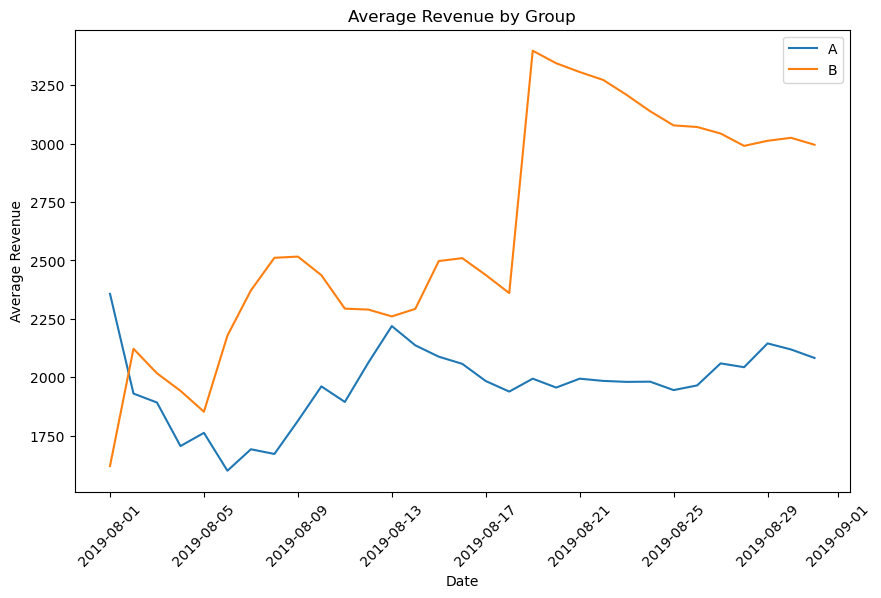

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= group_avg_order, x='date', y='avg_revenue', hue='group')
plt.xlabel('Date')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Group')
plt.legend()
plt.xticks(rotation=45);

Note
- Here we can see that we seem to have very high values ​​in group B and this may distort the test results.

3. Plot a graph of the relative difference in cumulative average order size for group B compared to group A. Make conclusions and conjectures.

In [18]:
# merging the dataframes
df_final = group_revenue.merge(group_avg_order, on= ['date', 'group', 'revenue'])
df_final.head()

,date,group,revenue,cumulative_revenue,avg_revenue
0,2019-08-01,A,2356.8,2356.8,2356.800000
1,2019-08-01,B,1620.0,1620.0,1620.000000
2,2019-08-02,A,1503.5,3860.3,1930.150000
3,2019-08-02,B,2623.8,4243.8,2121.900000
4,2019-08-03,A,1815.2,5675.5,1891.833333


In [19]:
# calculating the cumulative revenue of the groups
a_group = df_final[df_final['group'] == 'A']
b_group = df_final[df_final['group'] == 'B']

merged_groups = pd.merge(a_group[['date', 'cumulative_revenue']], b_group[['date', 'cumulative_revenue']], on='date', suffixes=('_A', '_B'))
merged_groups.head()

,date,cumulative_revenue_A,cumulative_revenue_B
0,2019-08-01,2356.8,1620.0
1,2019-08-02,3860.3,4243.8
2,2019-08-03,5675.5,6050.6
3,2019-08-04,6822.1,7767.9
4,2019-08-05,8810.2,9262.9


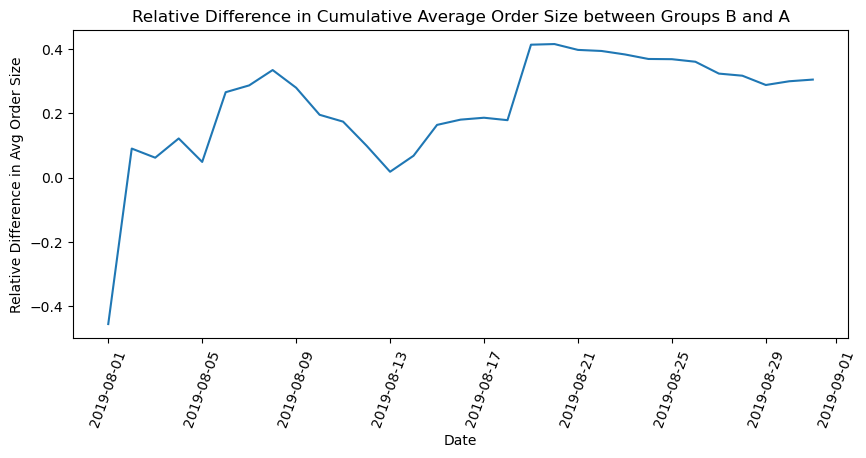

In [20]:
# creating the relative difference column
merged_groups['relative_diff'] = (merged_groups['cumulative_revenue_B'] - merged_groups['cumulative_revenue_A']) / merged_groups['cumulative_revenue_B']

plt.figure(figsize=(10, 4))
sns.lineplot(data= merged_groups, x='date', y='relative_diff')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Avg Order Size')
plt.title('Relative Difference in Cumulative Average Order Size between Groups B and A')
plt.xticks(rotation=70)
plt.show()


Note
- We observed the comparative difference between the two groups with fluctuations in some periods.

4. Calculate the conversion rate for each group as the ratio of orders to the number of visits for each day. Plot the daily conversion rates for the two groups and describe the difference

In [21]:
# merging the dataframes
df_orderss = df_orders.groupby(['date', 'group',]).agg({'revenue': 'sum', 'transactionId': 'nunique'}).reset_index()
df_orderss.head()

,date,group,revenue,transactionId
0,2019-08-01,A,2356.8,24
1,2019-08-01,B,1620.0,21
2,2019-08-02,A,1503.5,20
3,2019-08-02,B,2623.8,24
4,2019-08-03,A,1815.2,24


In [22]:
# merging the dataframes
df_visits = df_visits.groupby(['date', 'group'])['visits'].sum().reset_index()
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507


In [23]:
# merging the dataframes
df_complete = df_orderss.merge(df_visits, on= ['date', 'group'], how= 'left')
df_complete.head()

,date,group,revenue,transactionId,visits
0,2019-08-01,A,2356.8,24,719
1,2019-08-01,B,1620.0,21,713
2,2019-08-02,A,1503.5,20,619
3,2019-08-02,B,2623.8,24,581
4,2019-08-03,A,1815.2,24,507


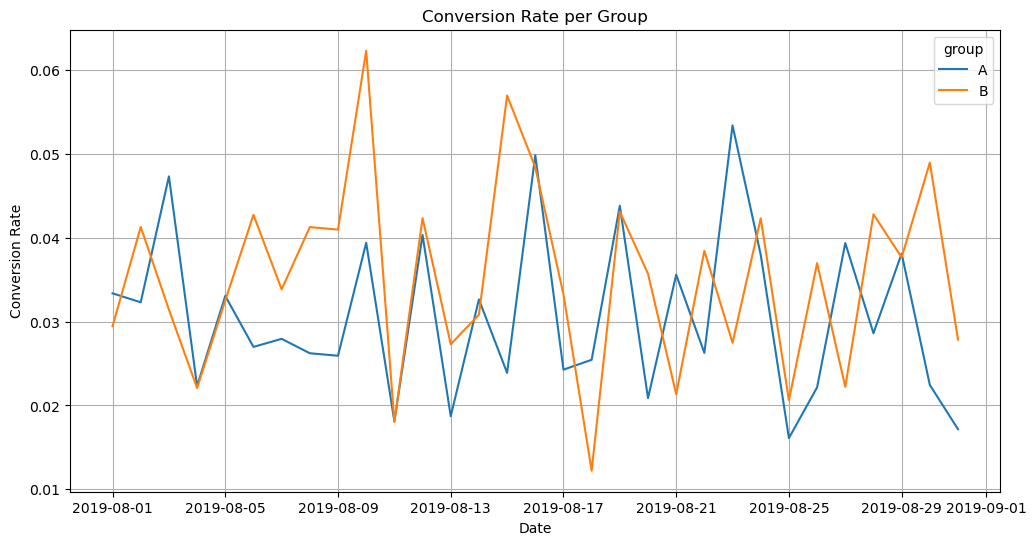

In [24]:
# creating the conversion rate column
df_complete['conversion_rate'] = df_complete['transactionId'] / df_complete['visits']

plt.figure(figsize=(12, 6))
sns.lineplot(data = df_complete, x = 'date', y= 'conversion_rate', hue = 'group' )
plt.title('Conversion Rate per Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid();

Note
- We observed that the daily conversion date varies according to time and at the beginning of the test is where we see the biggest difference but then the groups become very close to each other.

5. Make a scatterplot of the number of orders per user.

In [25]:
# merging the dataframes
df_complete = df_complete.merge(group_revenue, on= ['date', 'group', 'revenue'], how= 'left')
df_complete.head(1)

,date,group,revenue,transactionId,visits,conversion_rate,cumulative_revenue
0,2019-08-01,A,2356.8,24,719,0.03338,2356.8


In [26]:
# merging the dataframes
df_complete = df_complete.merge(group_avg_order, on=['date', 'group', 'revenue'], how='left' )
df_complete.head(1)

,date,group,revenue,transactionId,visits,conversion_rate,cumulative_revenue,avg_revenue
0,2019-08-01,A,2356.8,24,719,0.03338,2356.8,2356.8


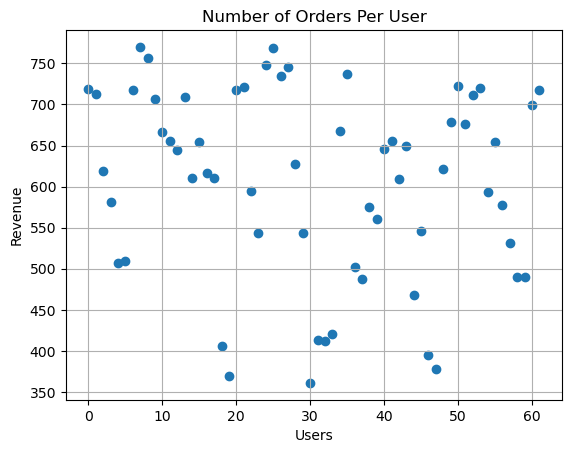

In [27]:
plt.scatter(data= df_complete, x= range(len(df_complete['transactionId'])), y= 'visits')
plt.title('Number of Orders Per User')
plt.xlabel('Users')
plt.ylabel('Revenue')
plt.grid();

6. Calculate the 95th and 99th percentiles for the number of orders per user.

In [28]:
percentage_orders = df_orders.groupby('visitorId')['transactionId'].nunique().reset_index()
percentage_orders = np.percentile(percentage_orders['transactionId'], [95, 99])
percentage_orders

array([2., 4.])

Note
- Less than 5% of users placed large orders

7. Make a scatter plot of order prices.

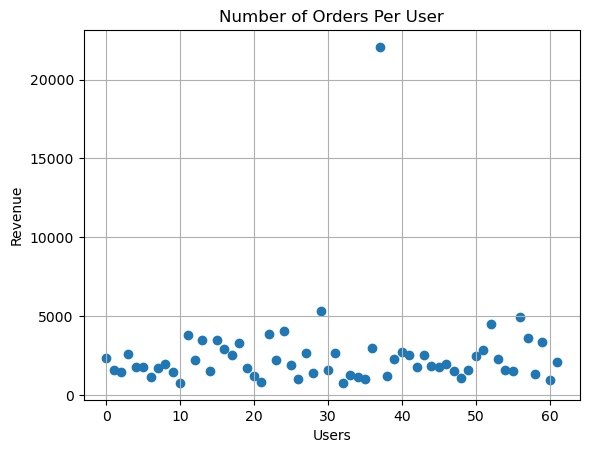

In [29]:
plt.scatter(data= df_complete, x= range(len(df_complete)), y= 'revenue')
plt.title('Number of Orders Per User')
plt.xlabel('Users')
plt.ylabel('Revenue')
plt.grid();

8. Calculate the 95th and 99th percentiles of order prices

In [30]:
percentage_revenue = np.percentile(df_complete['revenue'], [95, 99])
percentage_revenue

array([ 4490.39, 11876.07])

Note
- Less than 5% have values ​​above average

9. Find the statistical significance of the difference in conversion between groups using the raw data.

In [31]:
# p-value = 0.05

order_user_a = df_orders[df_orders['group']== 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
order_user_a.columns = ['userId', 'orders']

order_user_b = df_orders[df_orders['group']== 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
order_user_b.columns = ['userId', 'orders']

sampleA = pd.concat([order_user_a['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(order_user_a['orders'])), name='orders')],axis=0)

sampleB = pd.concat([order_user_b['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(order_user_a['orders'])), name='orders')],axis=0)

print(f'p-value',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print(f'relative conversion',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value 0.02046
relative conversion 0.133


Note
- The p-value is considerably less than 0.05. Analysis of the raw data showed that the conversion rates of the groups have statistically significant differences. The relative conversion gain for group B compared to group A is 13%.

10. Find the statistical significance of the difference in average order size between the groups using the raw data.

In [32]:
print(f'p-value', '{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print(f'relative difference','{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

p-value 0.692
relative difference 0.252


Note
-  p-value is greater than 0.05, then there are no statistically significant differences between the mean order volumes of the groups, indicating that any observed variation can be attributed to chance, and there is no strong evidence to suggest that there is a substantial difference between the groups or variables compared.

11. Find the statistical significance of the difference in conversion between the groups using the filtered data.

In [33]:
print(f'p-value', '{0:.3f}'.format(stats.mannwhitneyu(df_complete[df_complete['group']=='A']['conversion_rate'], df_complete[df_complete['group']=='B']['conversion_rate'])[1]))
print(f'relative difference','{0:.3f}'.format(df_complete[df_complete['group']=='B']['conversion_rate'].mean()/df_complete[df_complete['group']=='A']['conversion_rate'].mean()-1))

p-value 0.086
relative difference 0.150


Note
- The p-value is greater than 0.05. The filtered data shows that the conversion rate of the groups has no significant difference. The relative conversion in this case is 15%.

12. Find the statistical significance of the difference in average order size between the groups using the filtered data.

In [34]:
print(f'p-value', '{0:.3f}'.format(stats.mannwhitneyu(df_complete[df_complete['group']=='A']['revenue'], df_complete[df_complete['group']=='B']['revenue'])[1]))
print(f'relative difference','{0:.3f}'.format(df_complete[df_complete['group']=='B']['revenue'].mean()/df_complete[df_complete['group']=='A']['revenue'].mean()-1))

p-value 0.088
relative difference 0.438


Note
- p-value is greater than 0.05, then there are no statistically significant differences between the average order volumes of the filtered data groups.

# Conclusion

The test carried out, despite having shown some differences between groups A and B, did not demonstrate significant results to justify its continuation.
It is important to remember that time and resources are valuable. Considering that the test did not provide relevant insights, we must analyze whether it is worth continuing to invest in this type of approach.
We suggest reevaluating the test. We can end the current experimentation and explore new strategies to achieve the desired results.